In [1]:
import numpy as np
import logging
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

import cv2
import os

1.0

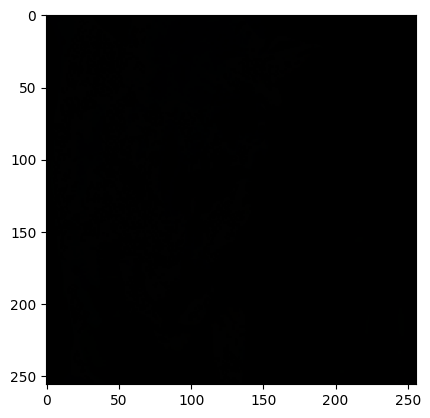

In [3]:
pth = "/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd/test/mmse_a/ILSVRC2012_val_00000012.png"

im = mpimg.imread(pth)
image_bgra = cv2.cvtColor(im, cv2.COLOR_RGBA2BGRA)
plt.imshow(image_bgra)

im.max()

In [8]:
pth0 = "/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd/test"
pth0.rsplit('/', 1)
#rewrite_images(pth0, "true")

['/home/cmk2000/Documents/Years 2/Python codes and results/Python codes/Codes/Diffusion codes with PnP/cmmd',
 'test']

In [7]:
# Get the dimensions of the image
height, width, _ = im.shape

# Create an alpha channel with full opacity
alpha_channel = 255 * np.ones((height, width, 1), dtype=np.uint8)

# Concatenate the alpha channel to the RGB image to create an RGBA image
image_rgba = np.concatenate((im, alpha_channel), axis=2)

image_rgba.shape

(256, 256, 4)

In [7]:
original_string = "methos_our_x_y"

# Split the string from the right, at the last underscore
parts = original_string.rsplit('_', 1)

# parts will be a list with two elements: ['methos_our_x', 'y']
part1 = parts[0]
part2 = parts[1]

print(part1)  # Output: methos_our_x
print(part2)  # Output: y

methos_our_x
y


In [5]:
def save_images(dir, image, name):
    image_array = cv2.cvtColor(image, cv2.COLOR_RGBA2BGRA)
    cv2.imwrite(os.path.join(dir,name+'.png'), image_array)
 
def rewrite_images(dir, folder):
    dir0, folder = dir.rsplit('/', 1)
    data = os.listdir(dir)

    for i in range(len(data)):
        data[i] = dir +'/' + data[i]
    
    for i_im in range(len(data)): 
        filename = data[i_im]
        dataname = filename.split("/")[-1]
        dataname = dataname.split(".")[0]

        im = mpimg.imread(filename) 
        im_channel = im.shape[-1]
        
        if im.shape[2] == 3:
            image_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        else:
            # If the image already has an alpha channel (4 channels), convert directly to RGBA
            image_rgb = cv2.cvtColor(im, cv2.COLOR_BGRA2RGBA)

        # Convert RGB to RGBA (add an alpha channel if not present)
        if image_rgb.shape[2] == 3:
            alpha_channel = 255 * np.ones((image_rgb.shape[0], image_rgb.shape[1], 1), dtype=image_rgb.dtype)
            image_rgba = np.concatenate((image_rgb, alpha_channel), axis=2)
        else:
            image_rgba = image_rgb

        # Convert RGBA to BGRA
        image_bgra = cv2.cvtColor(image_rgba, cv2.COLOR_RGBA2BGRA)

        dir_save = os.path.join(dir0, folder+"_a")
        os.makedirs(dir_save, exist_ok=True)
        save_images(dir_save, image_bgra, dataname)

In [12]:
# Create logger
dataset = "imaeg"
rate = 0.3
script_dir = "./"
logger_name = f'{dataset}_{rate}.log'
log_dir = os.path.join(script_dir)



# Configure the rotating file handler
log_file = os.path.join(log_dir, logger_name)
if os.path.isdir(log_file):
    raise IsADirectoryError(f"The specified log file path is a directory: {log_file}")

  # Configure the logging
logging.basicConfig(
    filename=log_file,                # Full path to the log file
    filemode='a',                      # Append mode
    level=logging.DEBUG,               # Set the logging level
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',  # Log format
    datefmt='%Y-%m-%d %H:%M:%S'        # Date format
)

# Create logger
logger = logging.getLogger(logger_name)


In [2]:
import torch 
import torch.autograd as autograd

In [3]:
n_p = 1
x = torch.randn(2,3,512,512)

In [4]:

import numpy as np
from scipy.stats import multivariate_normal

# Define the mean and covariance for a 64-dimensional Gaussian
mean = np.zeros(64)  # 64-dimensional mean vector
covariance = np.eye(64)  # 64-dimensional identity matrix as covariance

# Sample an 8x8 dataset (64 samples) from the multivariate Gaussian
sample = np.random.multivariate_normal(mean, covariance, size=1).reshape(8, 8)

# Flatten the sample to evaluate its density as a single point in 64-dimensional space
flattened_sample = sample.flatten()

# Create the multivariate Gaussian distribution object
mvn = multivariate_normal(mean=mean, cov=covariance)

# Evaluate the density of the flattened sample
flattened_sample = sample.flatten()
rotated_array = np.rot90(sample, axes=(0, 1)).flatten()
rotated_array3 = np.rot90(sample, axes=(0, 1), k = 3).flatten()
density = mvn.pdf(flattened_sample)
density90 = mvn.pdf(rotated_array)
density270 = mvn.pdf(rotated_array3)

print("Sampled Data (8x8):\n", sample)
print("\nDensity of the sampled data:", density,density90,density270)


Sampled Data (8x8):
 [[-1.7221139  -1.189945    0.37248194  0.5172517  -0.58492472  0.26583642
   0.08157086  1.11632898]
 [-0.13230387 -0.67933455  0.43893389  0.4105446   1.22359438  0.7073645
  -2.03205741  1.49277331]
 [ 1.47189703  1.87132905  1.29699647  0.18106929  0.46535161  0.71729812
  -0.24680149  0.16032971]
 [ 0.24151832  2.57724508 -0.73670525 -0.56212111 -0.08862862  0.57695159
  -1.76258043  0.12285138]
 [-0.02705797  0.76357363  1.88922104  0.27614342 -0.66155583  0.02398349
   0.90709855 -0.22512775]
 [-0.78821294  2.24234017 -0.98902164 -0.96222832 -0.76885618  0.41797133
   0.42291303  0.43741947]
 [ 0.32639628 -0.58946148 -0.23081269 -2.5814495   0.04809125  0.67558855
  -0.73250992 -0.15428817]
 [ 1.91011351  0.28468053 -1.4965565  -0.81358582  1.13740288  0.91786082
  -1.1420513  -0.08859178]]

Density of the sampled data: 6.739575604903608e-41 6.739575604903608e-41 6.739575604903608e-41


In [52]:
import math
 
def LinearScheduler(timesteps, beta_start = 0.0001, beta_end=0.02):
    scale = 1000 / timesteps
    beta_start = scale * beta_start
    beta_end = scale * beta_end
    betas = np.linspace(beta_start, beta_end, timesteps, dtype=np.float32)
    return betas

def CosineScheduler(timesteps, beta_max =0.999):
    cos_function = lambda x: math.cos((x + 0.008) / (1.008) * math.pi / 2)**2
    betas = []
    for t in range(timesteps):
        t1 = t/timesteps
        t2 = (t+1)/timesteps
        beta = min(1 - cos_function(t2) / cos_function(t1), beta_max)
        betas.append(beta)
    return np.array(betas)
        

In [94]:
timesteps = 1000
betas_c = CosineScheduler(lambda x:math.cos(x)/(500*math.cosh(x)), timesteps)
betas_l = LinearScheduler(timesteps)

In [95]:
alphas = 1.0 - betas_c
alphasl = 1.0 - betas_l
alphas_cumprod = np.cumprod(alphas, axis=0)
alphas_cumprodl = np.cumprod(alphasl, axis=0)

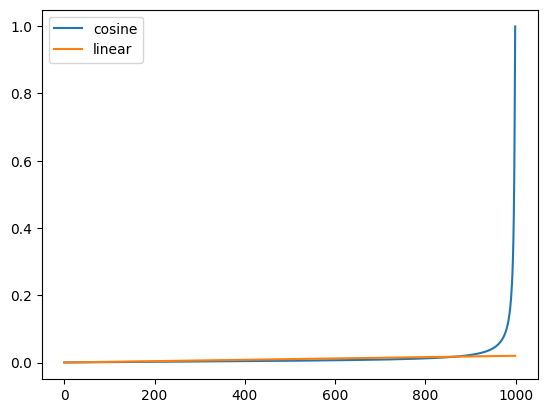

In [96]:
plot = plt.plot(range(timesteps), betas_c, label = "cosine")
plot = plt.plot(range(timesteps), betas_l, label = "linear")
plt.legend()

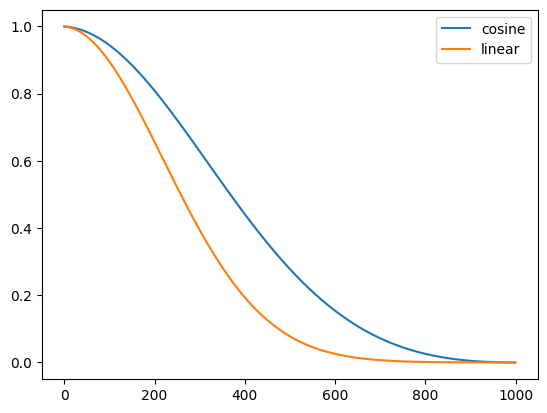

In [97]:

plot = plt.plot(range(timesteps), alphas_cumprod, label = "cosine")
plot = plt.plot(range(timesteps), alphas_cumprodl, label = "linear")
plt.legend()


In [129]:
def energy_net(x):
    return x* torch.randn_like(x)**2 + 3

In [162]:
def sliced_score_matching(energy_net, samples, n_particles=2):
    dup_samples = samples.unsqueeze(0).expand(n_particles, *samples.shape).contiguous().view(-1, *samples.shape[1:])
    dup_samples.requires_grad_(True)
    vectors = torch.randn_like(dup_samples)
    vectors = vectors / torch.norm(vectors, dim=-1, keepdim=True)

    logp = - energy_net(dup_samples)
    
    gradv = torch.sum(logp * vectors)
    grad2 = autograd.grad(gradv, dup_samples, create_graph=True)[0]
    loss2 = torch.sum(vectors * grad2, dim=tuple(range(-len(vectors.shape)+1,0)))
    loss2 = loss2.view(n_particles, -1).mean(dim=0)
    loss = loss2
    return loss

In [163]:
for _ in range(5):
    x = torch.randn_like(x)
    x.requires_grad_(True)
    print(sliced_score_matching(energy_net, x, n_particles=20))

torch.Size([40]) (-3, -2, -1)
tensor([-1536.2083, -1533.9630])
torch.Size([40]) (-3, -2, -1)
tensor([-1537.0726, -1535.5051])
torch.Size([40]) (-3, -2, -1)
tensor([-1534.5699, -1534.9790])
torch.Size([40]) (-3, -2, -1)
tensor([-1536.2279, -1534.9180])
torch.Size([40]) (-3, -2, -1)
tensor([-1536.8933, -1537.2433])
